In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [2]:
import matplotlib.pylab as plt

## Schedule generation examples

In [3]:
# --example schedules--
schedule_fixed = Schedule(num_nurses_needed=3)
schedule_fixed.print_schedule()

Week's Schedule 
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  | need: 3  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [4]:
schedule_random = Schedule(num_nurses_needed=3, is_random=True)
schedule_random.print_schedule()

Week's Schedule 
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 0  | need: 2  | need: 3  | need: 3  | need: 1  | need: 1  | need: 0  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 1  | need: 1  | need: 3  | need: 1  | need: 0  | need: 1  | need: 2  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 1  | need: 0  | need: 1  | need: 0  | need: 1  | need: 1  | need: 1  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


In [5]:
# Mo 1,2,3, Tu 1,2,3, We...
matrix_nurses_needed = [5,8,5, 4,7,4, 4,7,4, 4,7,5, 5,7,7, 6,7,8, 7,5,5]
schedule_random = Schedule(matrix_nurses_needed=matrix_nurses_needed, is_random=False)
schedule_random.print_schedule()

Week's Schedule 
+---------+----------+----------+----------+----------+----------+----------+----------+
|         | Mo       | Tu       | We       | Th       | Fr       | Sa       | So       |
+---------+----------+----------+----------+----------+----------+----------+----------+
| shift 1 | need: 5  | need: 4  | need: 4  | need: 4  | need: 5  | need: 6  | need: 7  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 2 | need: 8  | need: 7  | need: 7  | need: 7  | need: 7  | need: 7  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
| shift 3 | need: 5  | need: 4  | need: 4  | need: 5  | need: 7  | need: 8  | need: 5  |
|         | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  | nurses:  |
+---------+----------+----------+----------+----------+----------+----------+----------+


## Nurse generation examples 

In [3]:
# --example nurses--
# full time, no weekends
nurse = Nurse(id_name=0)
nurse.generate_shift_preferences(degree_of_agent_availability=1, works_weekends=False)
nurse.print_shift_preferences()


Nurse 0's Preferences. Availability: (1)Min/Max: 6/21
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  | x  | x  | x  |    |    |
| shift 2 | x  | x  | x  | x  | x  |    |    |
| shift 3 | x  | x  | x  | x  | x  |    |    |
+---------+----+----+----+----+----+----+----+


In [ ]:
# full time, weekends
nurse = Nurse(id_name=1)
nurse.generate_shift_preferences(degree_of_agent_availability=1, works_weekends=True)
nurse.print_shift_preferences()

# part time, no weekends
nurse = Nurse(id_name=2)
nurse.generate_shift_preferences(degree_of_agent_availability=0.78, works_weekends=False)
nurse.print_shift_preferences()

# part time, weekends
nurse = Nurse(id_name=3)
nurse.generate_shift_preferences(degree_of_agent_availability=0.5, works_weekends=True)
nurse.print_shift_preferences()

In [4]:
# --example generating nurses--
# generate 10 nurses that work 50% and on weekends
nurses = []
num_nurses = 10
for n in range(num_nurses):
    nurse = Nurse(id_name=n)
    nurse.generate_shift_preferences(degree_of_agent_availability=0.5, works_weekends=True)
    nurses.append(nurse)

In [6]:
# generate nurses in the model
model = abm_scheduling.NSP_AB_Model()
model.generate_nurses(num_nurses=5, degree_of_agent_availability=0.5, works_weekends=True)
model.print_nurse_productivity(nurses)

Nurse productivity -  
-- 0 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 1 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 2 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 3 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 4 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 5 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 6 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 7 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.availab:0.50,	prod: 0.00,	satisf: -1000.00
-- 8 ------------------------------- 
assigned:0,	min:6,	max: 10,	deg.ava

In [7]:
# Mo 1,2,3, Tu 1,2,3, We...
matrix_nurse_availability = ['x','x','', 'x','x','',  'x','x','', 'x','x','', 'x','x','', '','','', '','','']
nurse = Nurse(id_name=5)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=5, maximum_shifts=5)
nurse.print_shift_preferences()


Nurse 5's Preferences. Availability: (0.476)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  | x  | x  | x  |    |    |
| shift 2 | x  | x  | x  | x  | x  |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+


## Agent satisfaciton examples

Test cases:

- Nurse no assignments, min = 5
- Nurse 1 assignments, min = 5
- Nurse 5 assignments, min = 5
- Nurse 6 assignments, min = 4, max 5 **//will not happen in our Model

In [8]:
# Nurse no assignments, min = 5
matrix_nurse_availability = ['x','','', 'x','','',  'x','','', 'x','','', 'x','','', '','','', '','','']
nurse = Nurse(id_name=1)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=5, maximum_shifts=5)
nurse.print_shift_preferences()
nurse.print_assigned_shifts()
print("Nurse satisfaction, function: ", nurse.satisfaction_function, ": ", nurse.get_satisfaction())

Nurse 1's Preferences. Availability: (0.238)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  | x  | x  | x  |    |    |
| shift 2 |    |    |    |    |    |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+
Nurse 1's Assigned Shifts
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 |    |    |    |    |    |    |    |
| shift 2 |    |    |    |    |    |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+
Nurse satisfaction, function:  default :  -1000.0


Nurse 2's Preferences. Availability: (0.143)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  |    | x  |    | x  |    |    |
| shift 2 |    |    |    |    |    |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+
[-1000.0, 280.0887724224567, 280.0887724224567, 280.0887724224567, 280.0887724224567, 280.0887724224567, -200.0, -400.0, -600.0, -800.0, -1000.0, -1200.0, -1400.0, -1600.0, -1800.0, -2000.0, -2200.0, -2400.0, -2600.0, -2800.0, -3000.0, -3200.0]


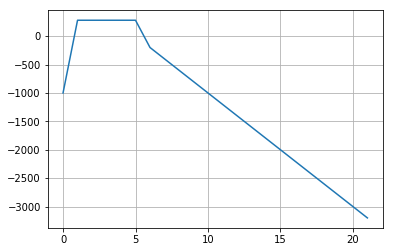

In [13]:
# Nurse, can work only in 1 shift, min 3, max 3 during the week
satisfaction_over_shift_assignment = []
matrix_nurse_availability = ['x','','', '','','',  'x','','', '','','', 'x','','', '','','', '','','']
nurse = Nurse(id_name=2)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=5, maximum_shifts=5)
nurse.print_shift_preferences()
schedule = Schedule(0)
# no assignments
satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
# start assignments
for shift in schedule.schedule:
    nurse.shifts.append((shift.day, shift.shift_num))
    satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
plt.plot(satisfaction_over_shift_assignment)
plt.grid(True)
print(satisfaction_over_shift_assignment)

Nurse 2's Preferences. Availability: (0.238)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  | x  | x  | x  |    |    |
| shift 2 |    |    |    |    |    |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+
[-1000.0, 280.0887724224567, 280.0887724224567, 280.0887724224567, 504.16019662496836, 504.16019662496836, -200.0, -400.0, -600.0, -800.0, -1000.0, -1200.0, -1400.0, -1600.0, -1800.0, -2000.0, -2200.0, -2400.0, -2600.0, -2800.0, -3000.0, -3200.0]


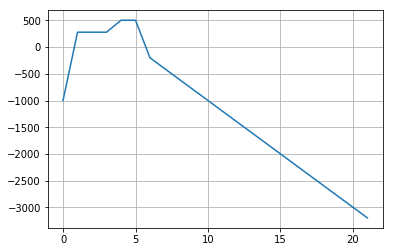

In [10]:
# Nurse, can work only in 1 shift, min 5, max 5 during the week
satisfaction_over_shift_assignment = []
matrix_nurse_availability = ['x','','', 'x','','',  'x','','', 'x','','', 'x','','', '','','', '','','']
nurse = Nurse(id_name=2)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=5, maximum_shifts=5)
nurse.print_shift_preferences()
schedule = Schedule(0)
# no assignments
satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
# start assignments
for shift in schedule.schedule:
    nurse.shifts.append((shift.day, shift.shift_num))
    satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
plt.plot(satisfaction_over_shift_assignment)
plt.grid(True)
print(satisfaction_over_shift_assignment)

Nurse 3's Preferences. Availability: (0.476)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  | x  | x  | x  |    |    |
| shift 2 | x  | x  | x  | x  | x  |    |    |
| shift 3 |    |    |    |    |    |    |    |
+---------+----+----+----+----+----+----+----+
[-1000.0, 280.0887724224567, 504.16019662496836, 504.16019662496836, 683.4195365357656, 826.8333333333333, -200.0, -400.0, -600.0, -800.0, -1000.0, -1200.0, -1400.0, -1600.0, -1800.0, -2000.0, -2200.0, -2400.0, -2600.0, -2800.0, -3000.0, -3200.0]


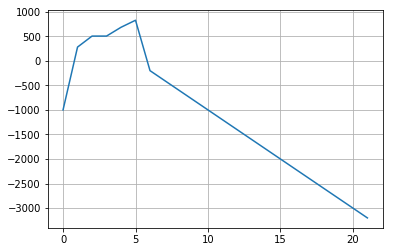

In [11]:
# Nurse, can work 2 different shifts, min 5, max 5 during the week
satisfaction_over_shift_assignment = []
matrix_nurse_availability = ['x','x','', 'x','x','',  'x','x','', 'x','x','', 'x','x','', '','','', '','','']
nurse = Nurse(id_name=3)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=5, maximum_shifts=5)
nurse.print_shift_preferences()
schedule = Schedule(0)
# no assignments
satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
# start assignments
for shift in schedule.schedule:
    nurse.shifts.append((shift.day, shift.shift_num))
    satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
plt.plot(satisfaction_over_shift_assignment)
plt.grid(True)
print(satisfaction_over_shift_assignment)

Nurse 3's Preferences. Availability: (0.667)
+---------+----+----+----+----+----+----+----+
|         | Mo | Tu | We | Th | Fr | Sa | So |
+---------+----+----+----+----+----+----+----+
| shift 1 | x  | x  |    | x  |    |    |    |
| shift 2 | x  | x  | x  | x  |    | x  | x  |
| shift 3 | x  | x  |    | x  |    | x  | x  |
+---------+----+----+----+----+----+----+----+
[-1000.0, 224.07101793796542, 403.3281572999747, 546.7356292286125, 661.4666666666667, 753.2621907615705, 826.7175651167491, -166.66666666666666, -333.3333333333333, -500.0, -666.6666666666666, -833.3333333333334, -1000.0, -1166.6666666666667, -1333.3333333333333, -1500.0, -1666.6666666666667, -1833.3333333333333, -2000.0, -2166.6666666666665, -2333.3333333333335, -2500.0]


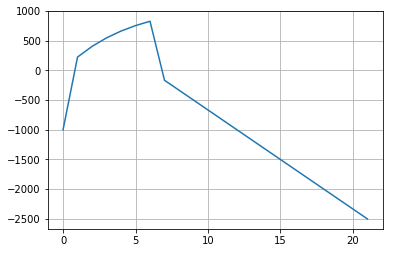

In [12]:
# Nurse, can work 3 different shifts, min 4, max 6 during the week
satisfaction_over_shift_assignment = []
matrix_nurse_availability = ['x','x','x', 'x','x','x',  '','x','', 'x','x','x', '','','', '','x','x', '','x','x']
nurse = Nurse(id_name=3)
nurse.assign_shift_preferences(matrix_nurse_availability=matrix_nurse_availability, minimum_shifts=4, maximum_shifts=6)
nurse.print_shift_preferences()
schedule = Schedule(0)
# no assignments
satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
# start assignments
for shift in schedule.schedule:
    nurse.shifts.append((shift.day, shift.shift_num))
    satisfaction_over_shift_assignment.append(nurse.get_satisfaction())
plt.plot(satisfaction_over_shift_assignment)
plt.grid(True)
print(satisfaction_over_shift_assignment)